In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst
import scipy.special as spspc
import collections

In [145]:
nruns = 100  # number of simulations per each N
Nvals = [10, 100, 1000, 10_000]

In [146]:
# average number of cycles in the net for each N.
num_cycles = np.zeros(len(Nvals))

for i, N in enumerate(Nvals):
    for _ in range(nruns):
#         G = nx.gnm_random_graph(N, N)
        G = nx.gnp_random_graph(N, 1 / (N - 1))
        nc = len(list(nx.cycle_basis(G)))
        num_cycles[i] += nc
    
    num_cycles[i] /= nruns

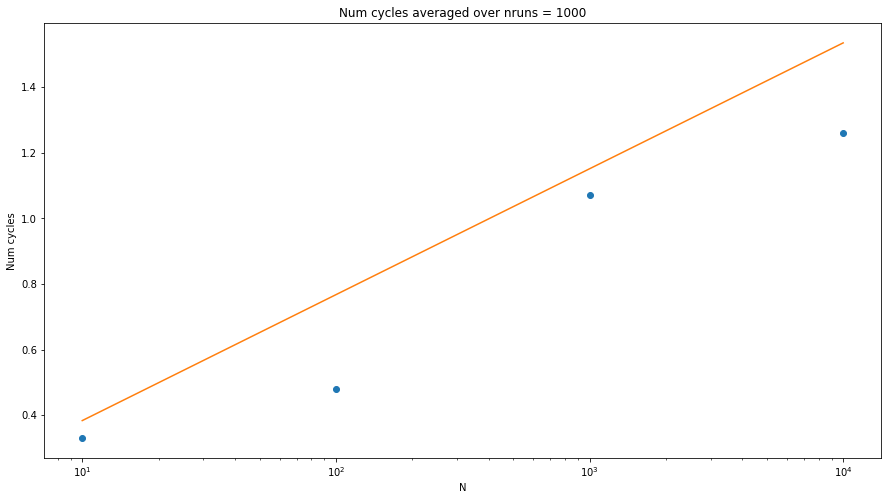

In [196]:
plt.figure(figsize=(15,8))

plt.semilogx(Nvals, num_cycles, 'o')
Nspace = np.logspace(1, 4)
plt.semilogx(Nspace, 1 / 6 * np.log(Nspace))
plt.xlabel('N')
plt.ylabel('Num cycles')
plt.title('Num cycles averaged over nruns = 1000');

In [203]:
N = 1000

# cycles_distr[i] is the average probability of having i cycles.
cycles_distr = np.zeros(N + 1)

nruns = 1000

for _ in range(nruns):
    G = nx.gnp_random_graph(N, 1 / (N - 1))
    nc = len(list(nx.cycle_basis(G)))
    cycles_distr[nc] += 1

cycles_distr /= nruns

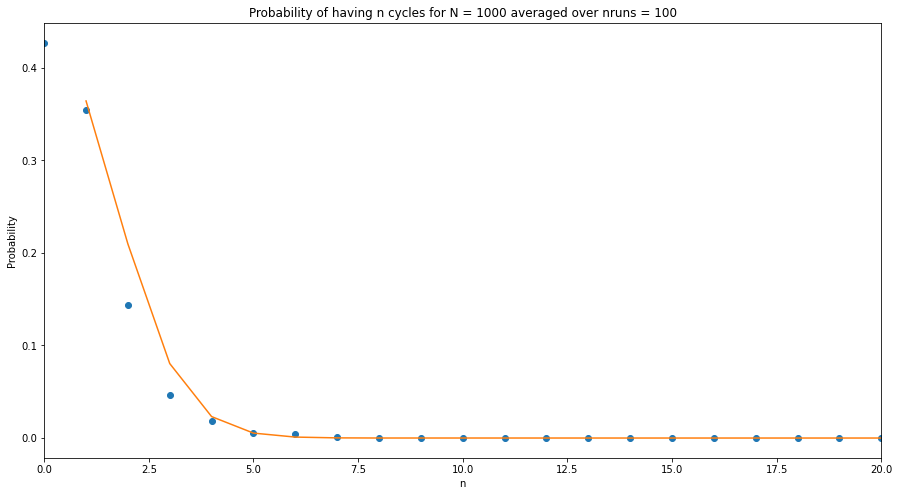

In [204]:
plt.figure(figsize=(15,8))

plt.plot(range(N + 1), cycles_distr, 'o')
nspace = np.arange(1, N, dtype=float)
plt.plot(nspace, 1 / spspc.factorial(nspace) / N**(1 / 6) * (1 / 6 * np.log(N))**nspace, '-')

plt.xlim(0, 20)
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability of having n cycles for N = 1000 averaged over nruns = 100');

In [252]:
nruns = 100

N = 1000

# cycles_distr[i] is the average probability of having i cycles.
cycles_distr = np.zeros(N + 1)

nruns = 1000

for _ in range(nruns):
    G1 = nx.gnp_random_graph(N, 1 / (N - 1))
    G2 = nx.gnp_random_graph(N, 1 / (N - 1))

    G1 = nx.convert_node_labels_to_integers(G1, first_label=0)
    G2 = nx.convert_node_labels_to_integers(G2, first_label=N)

    G = nx.compose(G1, G2)
    
    for n1, n2 in zip(G1.nodes, G2.nodes):
        G.add_edge(n1, n2)

    nc = len(list(nx.cycle_basis(G)))
    cycles_distr[nc] += 1

cycles_distr /= nruns

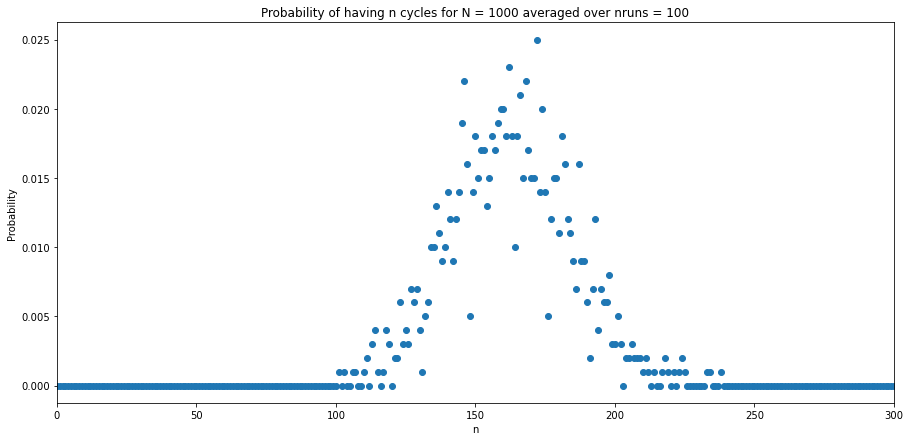

In [255]:
plt.figure(figsize=(15,7))

plt.plot(range(N + 1), cycles_distr, 'o')
nspace = np.arange(1, N, dtype=float)
# plt.plot(nspace, 1 / spspc.factorial(nspace) / N**(1 / 6) * (1 / 6 * np.log(N))**nspace, '-')

plt.xlim(0, 300)
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability of having n cycles for N = 1000 averaged over nruns = 100');